In [1]:
import pandas as pd 

In [2]:
# 1.1 read data 
filename = 'adult.csv'
df = pd.read_csv(filename)
df.head(5)

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [3]:
print(df.shape)

(32560, 15)


In [4]:
names = list(df.columns)
print(names)

['39', ' State-gov', ' 77516', ' Bachelors', ' 13', ' Never-married', ' Adm-clerical', ' Not-in-family', ' White', ' Male', ' 2174', ' 0', ' 40', ' United-States', ' <=50K']


<AxesSubplot:>

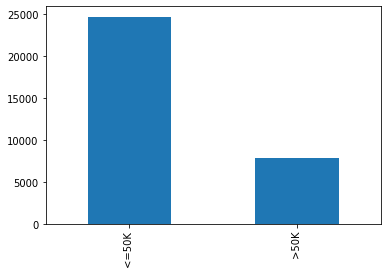

In [5]:
g = df[names[-1]].value_counts()
g.plot.bar()

In [6]:
types = df.dtypes
print(types)

39                 int64
 State-gov        object
 77516             int64
 Bachelors        object
 13                int64
 Never-married    object
 Adm-clerical     object
 Not-in-family    object
 White            object
 Male             object
 2174              int64
 0                 int64
 40                int64
 United-States    object
 <=50K            object
dtype: object


In [7]:
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()
a = ['lan','lan','hung','diep']
le.fit_transform(a)
b = le.transform(a)
print(b)

[2 2 1 0]


In [8]:
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()
for i in range(len(types)):
  if types[i]=='object':
    le.fit_transform(df[names[i]])
    df[names[i]] = le.transform(df[names[i]])

In [9]:
data = df.values
print(data[:2])

[[    50      6  83311      9     13      2      4      0      4      1
       0      0     13     39      0]
 [    38      4 215646     11      9      0      6      1      4      1
       0      0     40     39      0]]


In [10]:
X = data[:,:-1]
y = data[:,-1]
print(X.shape)
print(y.shape)

(32560, 14)
(32560,)


In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
print(X_scaled[0])

[0.45205479 0.75       0.0482376  0.6        0.8        0.33333333
 0.28571429 0.         1.         1.         0.         0.
 0.12244898 0.95121951]


In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,random_state=42,
                                                    test_size=0.25)

In [13]:
from sklearn.neighbors import KNeighborsClassifier
kNN = KNeighborsClassifier(n_neighbors=3)
kNN.fit(X_train,y_train)


KNeighborsClassifier(n_neighbors=3)

In [14]:
# prediction 
y_predict = kNN.predict(X_test)

In [15]:
error = 0
for i in range(len(X_test)):
  print(y_test[i],y_predict[i])
  if y_test[i] != y_predict[i]:
    error += 1
print(error) 

0 0
0 0
1 1
1 1
0 1
0 0
0 0
0 0
0 1
0 0
0 0
0 0
0 0
1 0
0 1
0 0
1 1
0 0
0 0
0 0
0 0
0 0
0 1
0 0
0 0
0 1
0 0
0 0
0 0
0 0
0 0
0 0
1 1
0 0
0 0
1 0
0 0
0 0
0 0
1 1
0 0
0 0
0 0
0 0
0 0
0 0
1 1
0 1
1 1
1 0
0 0
0 0
0 0
0 0
0 0
0 0
1 1
0 0
0 0
1 0
0 0
0 0
0 1
1 1
0 0
0 0
0 0
0 0
0 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
1 1
0 0
0 0
0 0
1 0
0 0
1 0
1 1
0 0
1 0
1 0
0 0
0 0
0 0
0 0
0 0
1 1
0 0
0 0
0 0
0 0
1 1
0 0
1 0
1 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 1
0 0
0 0
0 0
0 0
0 0
1 1
0 0
0 0
0 0
0 0
1 0
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 1
1 0
0 0
1 1
0 0
0 1
1 1
1 1
0 0
0 0
0 0
1 1
0 0
0 0
0 0
1 0
0 0
0 0
0 0
0 0
0 0
1 0
0 0
1 0
1 0
0 0
0 1
1 0
0 0
0 0
0 0
0 0
1 1
0 0
0 1
0 1
0 0
0 0
0 0
0 0
0 0
0 0
1 1
1 0
1 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
1 1
1 1
0 0
0 0
1 0
1 1
1 1
0 1
0 0
0 0
1 1
0 0
0 1
0 0
1 1
1 1
1 0
1 1
1 0
0 0
0 0
0 1
0 0
0 0
0 0
0 0
0 0
0 1
0 0
0 0
0 0
0 0
0 0
0 0
0 0
0 1
1 1
0 0
0 1
1 1
0 0
0 1
1 1
0 0
0 0
0 0
1 0
0 0
0 0
0 1
1 1
0 0
0 0
0 0
0 0
0 1
0 0
0 0
0 0
1 0
0 0
1 1
0 0
0 0
0 0
1 1
0 0
0 0
0 0
